# Minimizing Cost in Linear Regression with TF

https://github.com/deeplearningzerotoall/TensorFlow/blob/master/tf_2.x/lab-03-1-Linear-Regression-and-Minimizing-Cost-eager.ipynb
https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-03-1-minimizing_cost_show_graph.py

## Read in Libraries

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Recap (using tf.keras for linear regression)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 1.9902
Epoch 2/100
1/1 [==============================] - 0s 989us/step - loss: 0.9526
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4833
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2693
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.1701
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.1227
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0986
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0853
Epoch 9/100
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 3.5039e-04
Epoch 98/100
1/1 [==============================] - 0s 1ms/step - loss: 3.2973e-04
Epoch 99/100
1/1 [==============================] - 0s 1ms/step - loss: 3.1028e-04
Epoch 100/100
1/1 [==============================] - 0s 1ms/step - loss: 2.9198e-04
[[-3.9715834]
 [-2.9853787]]


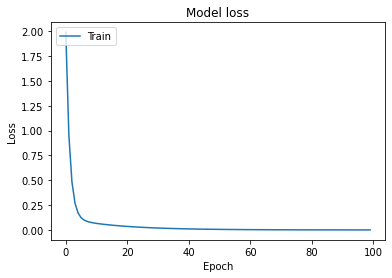

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(lr=0.1)
tf.model.compile(loss='mse', optimizer=sgd)

tf.model.summary()

# fit() trains the model and returns history of train
history = tf.model.fit(x_train, y_train, epochs=100)

y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Cost functions in pure python

In [7]:
import numpy as np

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


## Cost Function in TF

In [8]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    hypothesis = X * W
    return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


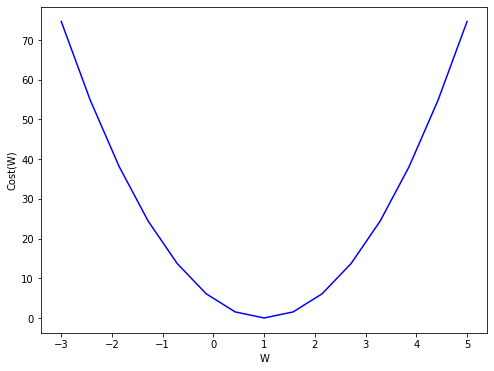

In [9]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

## Gradient Descent Implementation

In [10]:
tf.random.set_seed(0)  # for reproducibility

In [11]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


In [12]:
print(5.0 * W)
print(2.5 * W)

tf.Tensor([5.0001483], shape=(1,), dtype=float32)
tf.Tensor([2.5000741], shape=(1,), dtype=float32)


In [13]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([5.0])

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004
